<center>

**EE6347 : Devices and Technologies for AI and Neuromorphic Computing**

**Assignment 7 : Izhikevich Model**

Name : ANIRUDH B S ; Roll No. : EE21B019
</center>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def Izhikevich_Model(_I = 10, a = 0.02, b = 0.2, c = -55, d = 10):
  spike_value = 35        #Maximum Spike Value

  #Simulation Setup : Time
  T = 1000                #Total simulation time (ms)
  dt = 0.5                #Step size (ms)
  time = np.arange(0, T+dt, dt)
  ts = 50             #Start Time
  te = T              #End Time

  #Simulation Setup : Voltage
  v_array = np.zeros(len(time))   #Voltage history
  v_array[0] = -70                #initial set to resting potential
  v = v_array[0]

  #Simulation Setup : Recovery
  u_array = np.zeros(len(time))   #Recovery history
  u_array[0] = -14
  u = u_array[0]

  #Simulation setup : Current
  I_array = np.zeros(len(time))

  #Simulation Loop
  for i in range(len(time)):

    t = time[i]
    if t >= ts and t <= te:
        I = _I
    else:
        I = 0

    # check for spike and reset if v >= 30 mV (reset-condition):
    if v >= 30:
        v = c  # reset membrane potential v to c
        u += d # increase recovery variable u by d

    # Euler's method for numerical integration:
    v += dt * 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    u += dt * a * (b * v - u)

    # store values for plotting:
    u_array[i] = u
    v_array[i] = v
    I_array[i] = I

  return u_array, v_array, I_array, time

In [15]:
U, V, I, T = Izhikevich_Model()

In [16]:
print(V)

[-70.         -70.         -70.         ...  81.12231849 -56.57404066
 -58.32538396]


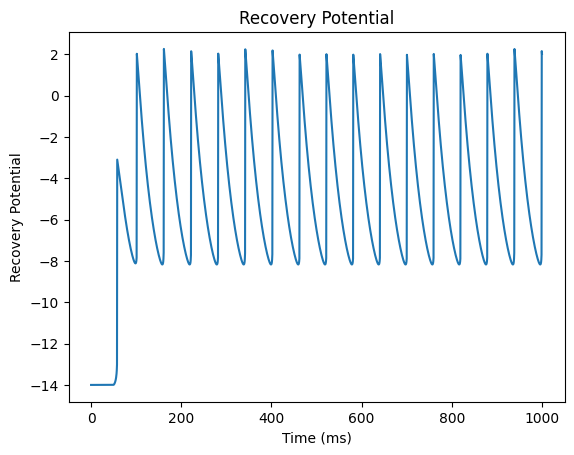

In [17]:
plt.plot(T, U)
plt.title('Recovery Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Recovery Potential')
plt.show()

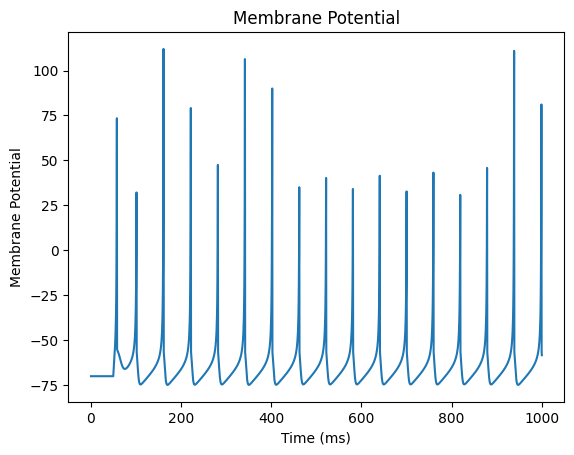

In [18]:
plt.plot(T, V)
plt.title('Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.show()